<center>
    <span style="color: #2E86C1; font-size: 3em;">
        &#128202; Exploratory Data Analysis
    </span>
</center>

# Nội dung Notebook

Notebook này được xây dựng nhằm thực hiện phân tích khám phá dữ liệu (Exploratory Data Analysis - EDA) cho tập dữ liệu đầu vào, với mục tiêu chính là hiểu rõ đặc điểm của dữ liệu thông qua các công đoạn:
* Nắm bắt nội dung các đặc trưng của dữ liệu.
* Kiểm tra tình trạng dữ liệu.
* Thống kê mô tả- Kiểm tra các phân vùng giá trị, min, max...
* Phát hiện dữ liệu bất thường (outlier).
* Kiểm tra tương quan giữa các đặc trưng.

<h1 align="center">📖 Mục lục</h1>

[I. Tổng quan đặc trưng ](#i)

[II. Nhóm  đặc trưng về giao dịch mua bán](#ii)

[III. Nhóm  đặc trưng về  ](#iii)

[IV. Nhóm  đặc trưng về ](#iv)

[V. Nhóm  đặc trưng về ](#v)

[VI. Các  đặc trưng khác ](#vi)




## Import các thư viện hỗ trợ

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import folium
import re

## Đọc dữ liệu

In [58]:
data_folder='../Dataset/'

In [59]:
data = pd.read_csv(data_folder + 'dataset.csv')
test_data = pd.read_csv(data_folder + 'test.csv')

## I. Tổng quan đặc trưng <a id="iv"></a>

In [60]:
train_data = data.drop('id', axis = 1)

In [61]:
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical characteristics:\n ", num_features)

cat_features = data.select_dtypes(include=['object']).columns.tolist()
print("\nClassification characteristics: \n", cat_features)

Numerical characteristics:
  ['id', 'sale_price', 'sale_nbr', 'join_year', 'latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other']

Classification characteristics: 
 ['sale_date', 'sale_warning', 'join_status', 'city', 'zoning', 'subdivision', 'submarket']


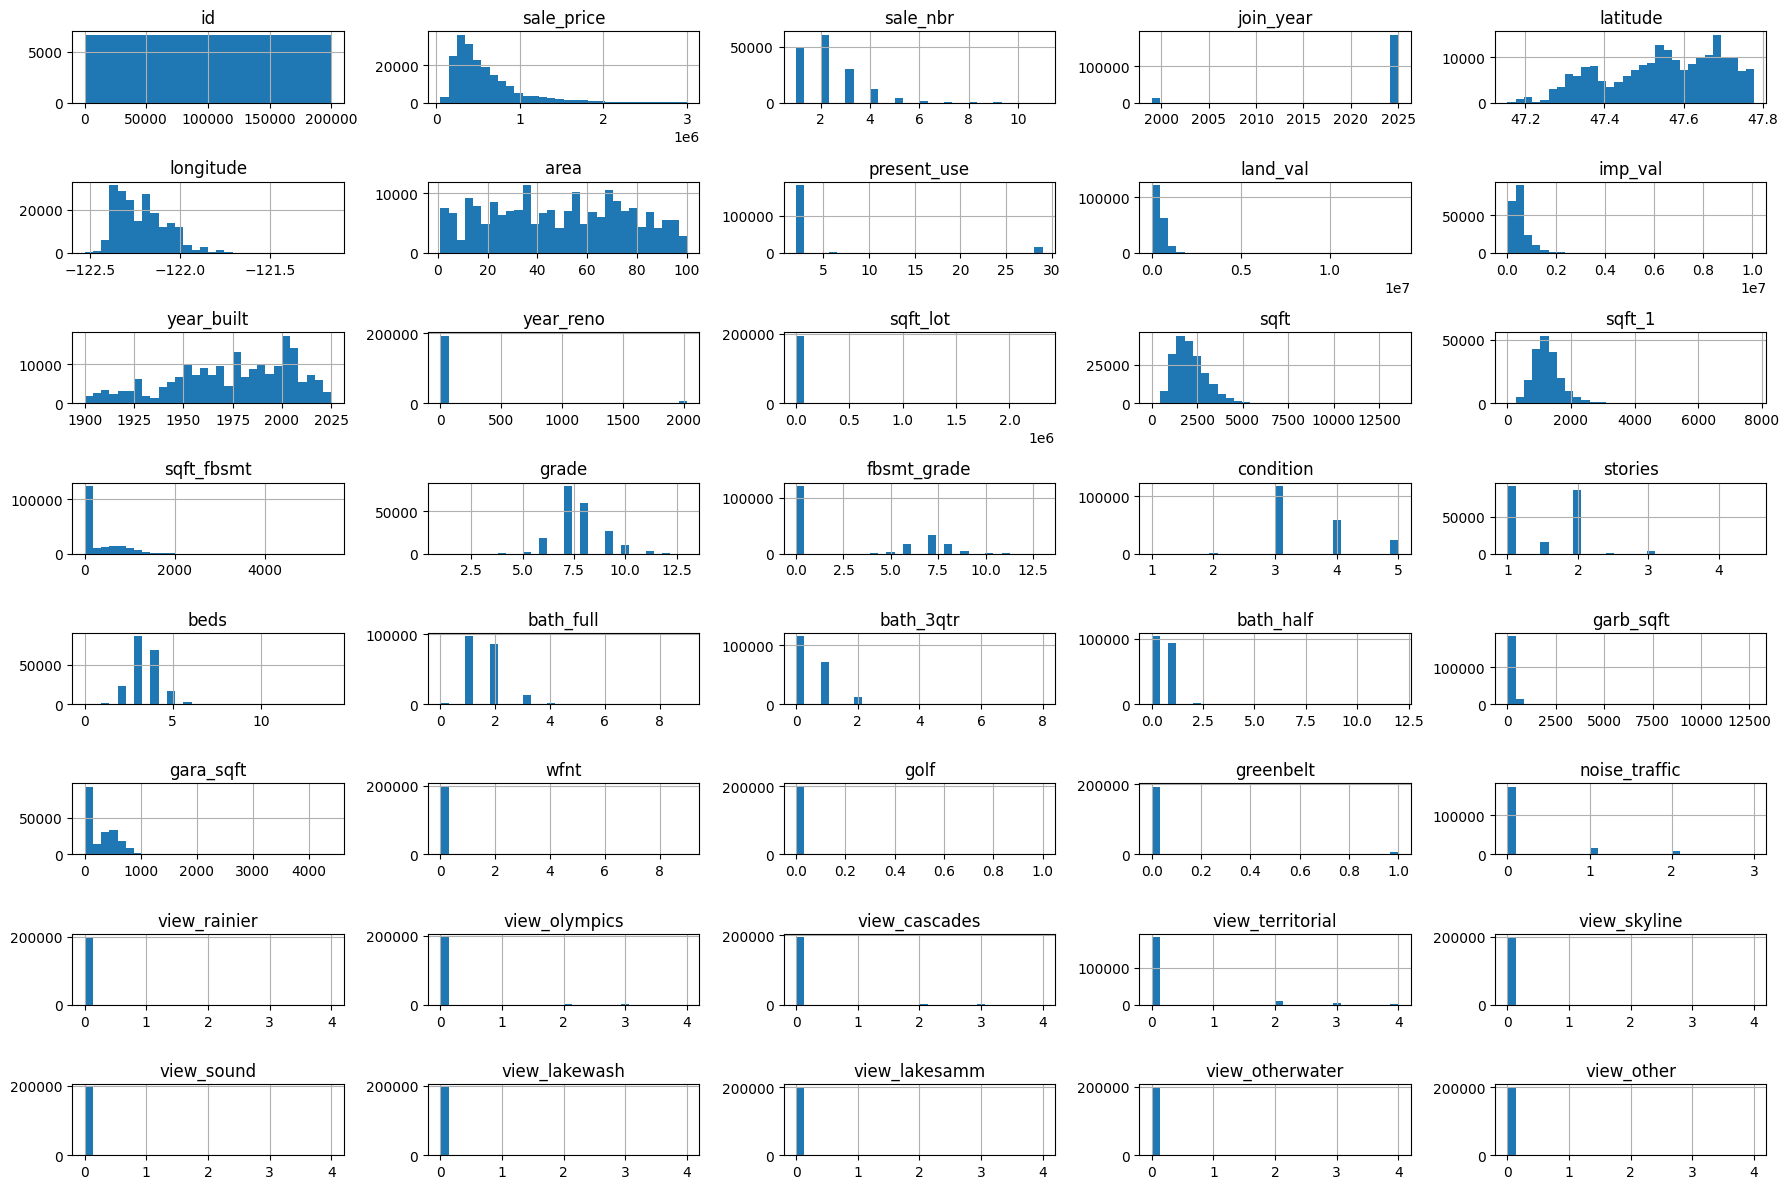

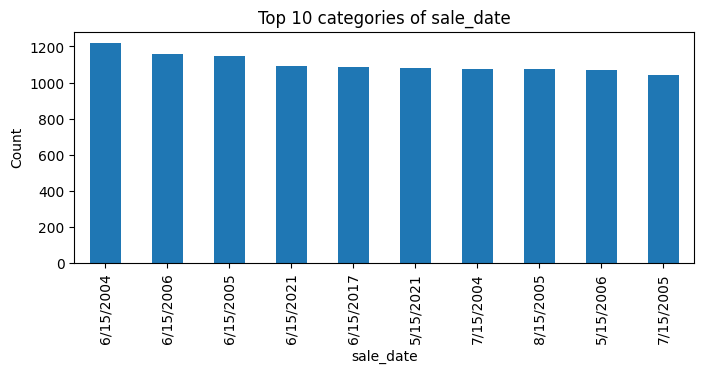

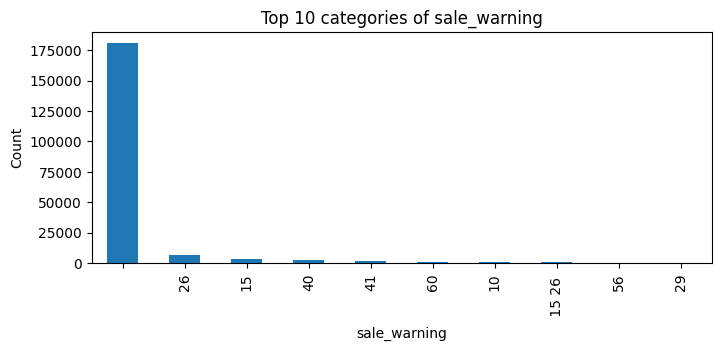

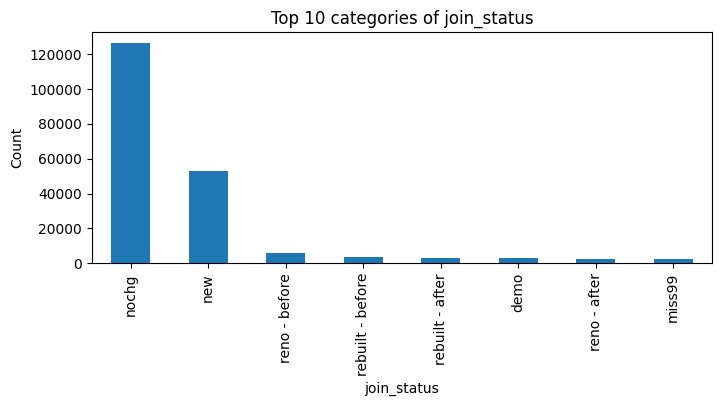

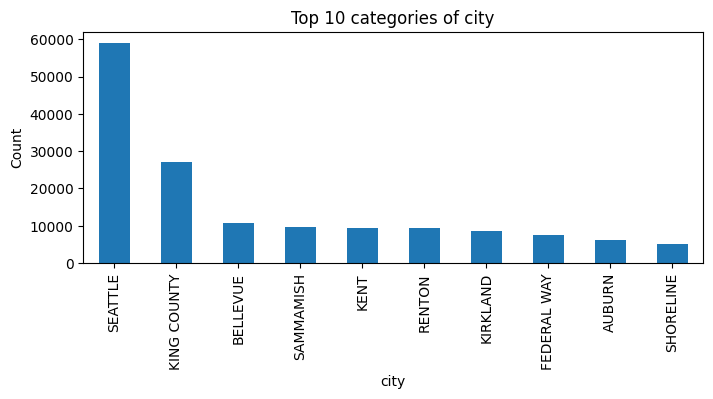

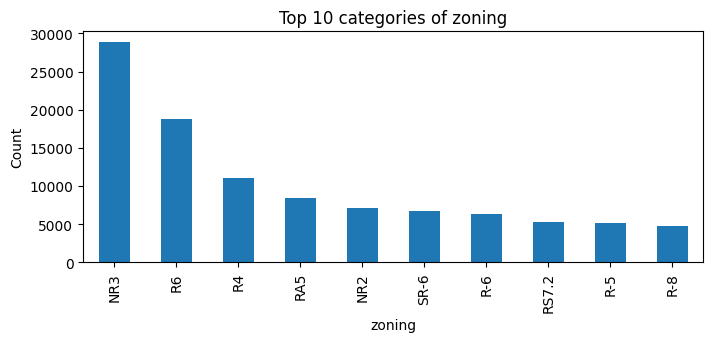

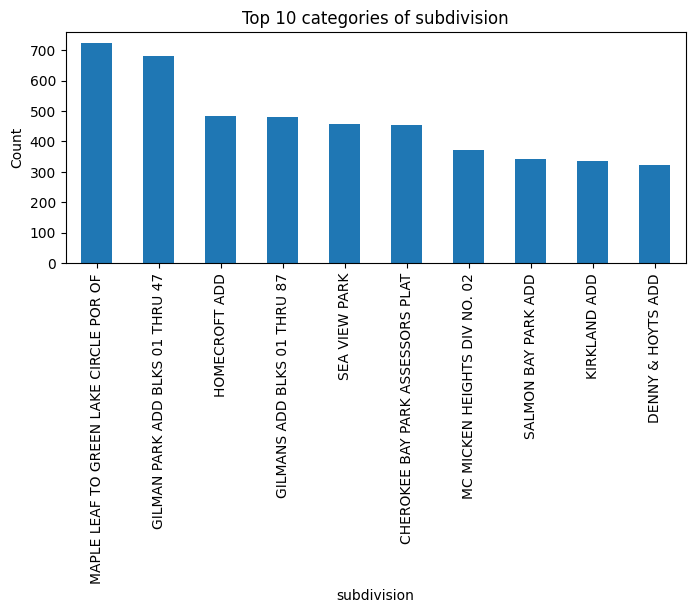

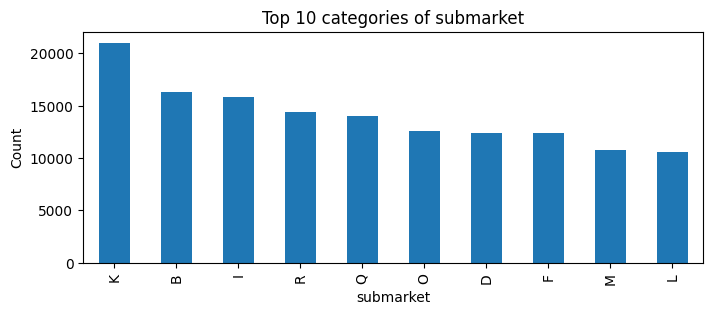

In [62]:
data[num_features].hist(figsize=(18, 12), bins=30, layout=(8, 5))
plt.tight_layout()
plt.show()

for col in cat_features:
    plt.figure(figsize=(8, 3))
    data[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 categories of {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

## II . Nhóm đặc trưng về giao dịch mua bán <a id="ii"></a>

**a) Các đặc trưng về giao dịch mua bán**

| Tên đặc trưng         | Mô tả                |
|-----------------------|---------------------------------------------|
| sale_date             | Ngày bán                     |
| sale_price            | Giá bán                     |
| sale_nbr              | Số lần căn nhà được bán                    |
| sale_warning          | Mức cảnh báo giao dịch                     |
| join_status           | Trạng thái khi hợp với bộ dữ liệu khác                     |
| join_year             | Năm ghi nhận dữ liệu                     |

In [63]:
trans_cols= ['sale_date', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status', 'join_year']
trans_data= data[trans_cols]
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sale_date     200000 non-null  object 
 1   sale_price    200000 non-null  int64  
 2   sale_nbr      157818 non-null  float64
 3   sale_warning  200000 non-null  object 
 4   join_status   200000 non-null  object 
 5   join_year     200000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.2+ MB


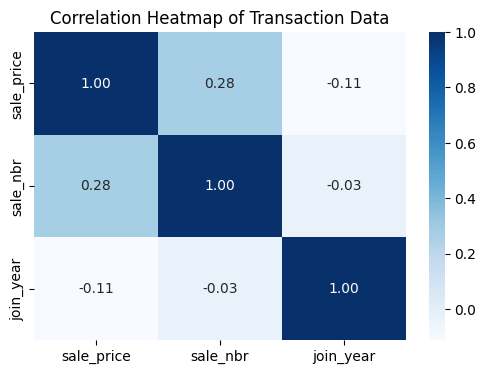

In [64]:
trans_num_cols = trans_data.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(trans_num_cols.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Transaction Data")
plt.show()

**b) Sale_date: Ngày thực hiện giao dịch**

In [65]:
invalid_dates = data['sale_date'][~data['sale_date'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$')]
print("Invalid date formats:", invalid_dates.unique())


Invalid date formats: ['11/15/2014' '1/15/1999' '8/15/2006' '12/15/1999' '7/15/2018' '2/15/2010'
 '10/15/2016' '8/15/2001' '1/15/2002' '5/15/2022' '10/15/2020' '9/15/2004'
 '3/15/2018' '5/15/2021' '3/15/2002' '2/15/2006' '6/15/2012' '7/15/2000'
 '9/15/2016' '4/15/2013' '4/15/2015' '6/15/2001' '11/15/2006' '11/15/2005'
 '7/15/2005' '10/15/2002' '4/15/2011' '8/15/2000' '11/15/2000' '6/15/2023'
 '8/15/2018' '12/15/2012' '3/15/2015' '12/15/2015' '8/15/1999'
 '12/15/2006' '8/15/2012' '1/15/2017' '11/15/2012' '9/15/2003'
 '12/15/2018' '9/15/2024' '3/15/2005' '2/15/2004' '9/15/2023' '3/15/2017'
 '10/15/2019' '5/15/2008' '6/15/2015' '2/15/2020' '6/15/2019' '7/15/2009'
 '2/15/2001' '12/15/2021' '10/15/2014' '10/15/2024' '7/15/2020'
 '9/15/2008' '9/15/2000' '8/15/2007' '10/15/2012' '5/15/2006' '12/15/2024'
 '3/15/2020' '3/15/2008' '10/15/2008' '9/15/2005' '10/15/2004' '9/15/2007'
 '11/15/2015' '5/15/2004' '6/15/2004' '4/15/2000' '11/15/2023' '4/15/2005'
 '7/15/2017' '6/15/2016' '5/15/2003' '6/15

Tất cả giá trị của sale_date hiện tại đều đồng nhất format và đều có dạng YYYY-MM-DD

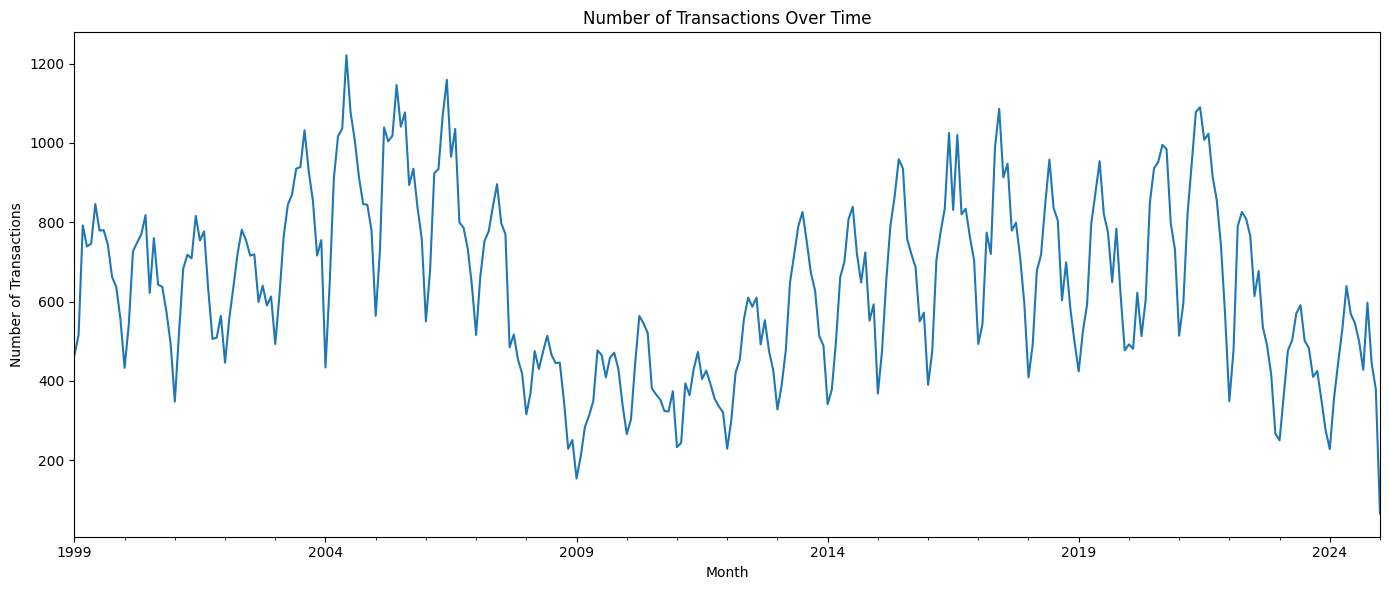

In [66]:

data['sale_date'] = pd.to_datetime(data['sale_date'])

monthly_transactions = data.groupby(data['sale_date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 6))
monthly_transactions.plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

 
- Dữ liệu có tính chu kỳ rõ rệt: Các đỉnh và đáy lặp lại theo chu kỳ đều đặn (~12 tháng), cho thấy một mô hình thời vụ (seasonal)

- Xu hướng dài hạn:

    * Từ 1999 đến khoảng 2006: Xu hướng tăng dần, có nhiều đỉnh cao.

    * Từ 2007 đến 2012: Giảm dần về số lượng giao dịch. Có thể trùng với khủng hoảng tài chính toàn cầu 2008.

    * Từ 2013 đến 2020: Có dấu hiệu phục hồi và dao động quanh mức trung bình.

    * Từ 2020 về sau: Dao động giảm dần, đặc biệt là cuối biểu đồ có sự giảm mạnh, có thể liên quan đến đại dịch COVID-19 hoặc các biến động kinh tế sau đó.
- Về mặt tính chất dữ liệu có thể thấy dữ liệu không có ngoại lai, các giao dịch đều được thực hiện liên tục với khoảng giá trị nghỉ ngắn, các giao dịch được thực hiện kéo dài từ năm 1999 đến khoảng 2025


**c) Sale_price: Giá trị giao dịch**

In [67]:
trans_data['sale_price'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: sale_price
Non-Null Count   Dtype
--------------   -----
200000 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [68]:
trans_data['sale_price'].describe()

count    2.000000e+05
mean     5.841495e+05
std      4.170595e+05
min      5.029300e+04
25%      3.050000e+05
50%      4.599500e+05
75%      7.249500e+05
max      2.999950e+06
Name: sale_price, dtype: float64

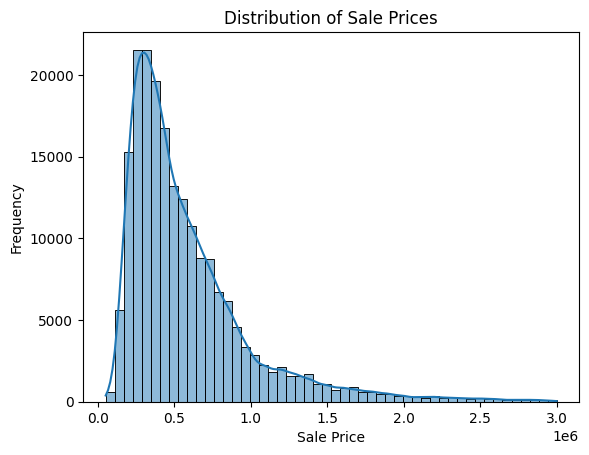

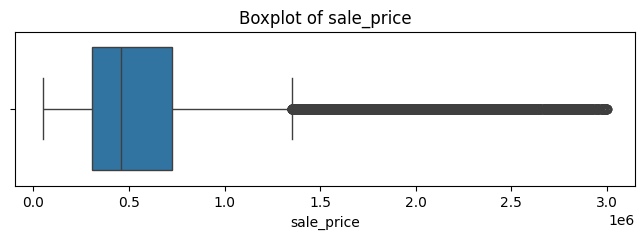

In [69]:
sns.histplot(trans_data['sale_price'], bins=50, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.figure(figsize=(8, 2))
sns.boxplot(x=trans_data['sale_price'])
plt.title(f'Boxplot of sale_price')
plt.show()

Quan sát phân bổ dữ liệu ta có thể nhận thấy:
* Mức giá giao dịch các bất động sản rất đa dạng, điều này là phù hợp bởi giá trị này chịu ảnh hưởng bởi rất nhiều yếu tố đồng thời cũng đáp ứng nhu cầu định cư của người dân.  
* Mức giá nhỏ nhất là khoảng 50.000$ và mức giá lớn nhất lên đến gần 3 triệu $.  
* Đỉnh cao nhất tập trung ở mức giá 200.000 - 500.000 $, tần suất giảm dần theo hướng giá cao hơn và có đuôi rất dài phía bên phải &rarr; dữ liệu có xu hướng lệch phải và tồn tại lượng lớn giá trị ngoại lai (các bất động sản có giá giao dịch lớn).
* Giá trị trung bình/trung vị: Hộp (box) nằm chủ yếu ở phía bên trái của biểu đồ, cho thấy phần lớn các giá trị sale_price tập trung ở mức thấp hơn. Đường kẻ dọc bên trong hộp (median) cũng nằm lệch về phía bên trái của hộp, củng cố thêm nhận định về việc dữ liệu bị lệch phải.

In [70]:
Q1 = trans_data['sale_price'].quantile(0.25)
Q3 = trans_data['sale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = trans_data[(trans_data['sale_price'] < lower_bound) | (trans_data['sale_price'] > upper_bound)]
print(f"Number of outliers in sale_price: {outliers.shape[0]}")

Number of outliers in sale_price: 11736


Tuy giá trị ngoại lai không quá nhiều ~5% tổng số mẫu nhưng không nên loại bỏ các mẫu này bởi chúng sẽ là tiền đề tốt để dự đoán các trường hợp bất động sản đặc biệt, thường là các bất động sản giá trị cao sẽ có rất ít mẫu bởi chỉ phục vụ cho một lượng nhỏ cá nhân có điều kiện kinh tế tốt vốn cần được dự đoán chính xác hơn.

Để có thể đưa vào sử dụng trong mô hình nên ưu tiên các mô hình không hoặc ít bị ảnh hưởng bởi các giá trị ngoại lai hoặc cần có bước chuẩn hoá phù hợp trước khi huấn luyện.

C:\Users\queol\AppData\Local\Temp\ipykernel_2924\2569105568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_data['sale_date'] = pd.to_datetime(trans_data['sale_date'])
C:\Users\queol\AppData\Local\Temp\ipykernel_2924\2569105568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_data['month'] = trans_data['sale_date'].dt.to_period('M')


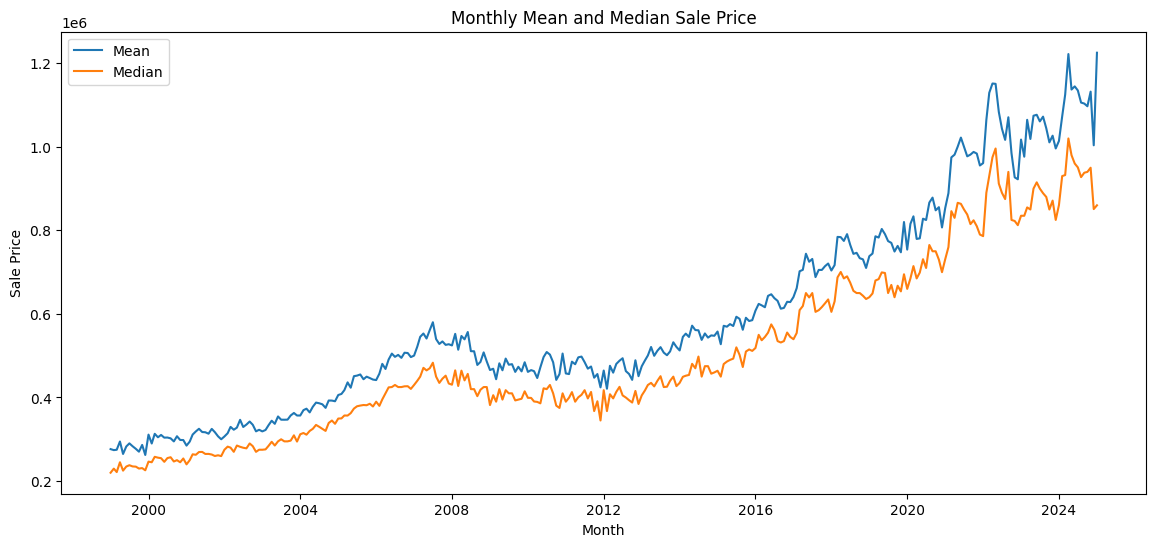

In [71]:
trans_data['sale_date'] = pd.to_datetime(trans_data['sale_date'])
trans_data['month'] = trans_data['sale_date'].dt.to_period('M')
monthly_price = trans_data.groupby('month')['sale_price'].agg(['mean', 'median', 'count'])
monthly_price.index = monthly_price.index.to_timestamp()
plt.figure(figsize=(14, 6))
plt.plot(monthly_price.index, monthly_price['mean'], label='Mean')
plt.plot(monthly_price.index, monthly_price['median'], label='Median')
plt.title('Monthly Mean and Median Sale Price')
plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

**Xu hướng tăng trưởng dài hạn**: Cả giá bán trung bình (Mean) và trung vị (Median) đều cho thấy một xu hướng tăng trưởng rõ rệt theo thời gian, bắt đầu từ khoảng 200.000 vào năm 2000 và đạt đỉnh trên 1.200.000 (đối với giá trung bình) và gần 1.000.000 (đối với giá trung vị) vào cuối giai đoạn. Điều này cho thấy thị trường bất động sản (hoặc sản phẩm được theo dõi) đã trải qua một giai đoạn tăng trưởng đáng kể trong hơn hai thập kỷ.

**Trung bình cao hơn trung vị**: Trong hầu hết toàn bộ giai đoạn, đường "Mean" (màu xanh) luôn nằm trên đường "Median" (màu cam). Điều này chỉ ra rằng phân phối giá bán có xu hướng lệch phải (right-skewed).

**Tương quan**: Mặc dù không thể tính tương quan, bỏ qua một số giai đoạn đặc biệt do các sự kiện thế giới gây ảnh hưởng lớn thì nhìn chung giá bất động sản tăng đều theo thời gian.

**d) Sale_nbr: số lần chuyển chủ**

In [72]:
trans_data['sale_nbr'].describe()

count    157818.000000
mean          2.162599
std           1.113090
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          11.000000
Name: sale_nbr, dtype: float64

In [73]:
trans_data['sale_nbr'].median()

np.float64(2.0)

In [74]:
trans_data['sale_nbr'].value_counts()

sale_nbr
2.0     60735
1.0     48977
3.0     29924
4.0     12167
5.0      4287
6.0      1280
7.0       333
8.0        84
9.0        22
10.0        5
11.0        4
Name: count, dtype: int64

In [75]:
trans_data['sale_nbr'].isna().sum()

np.int64(42182)

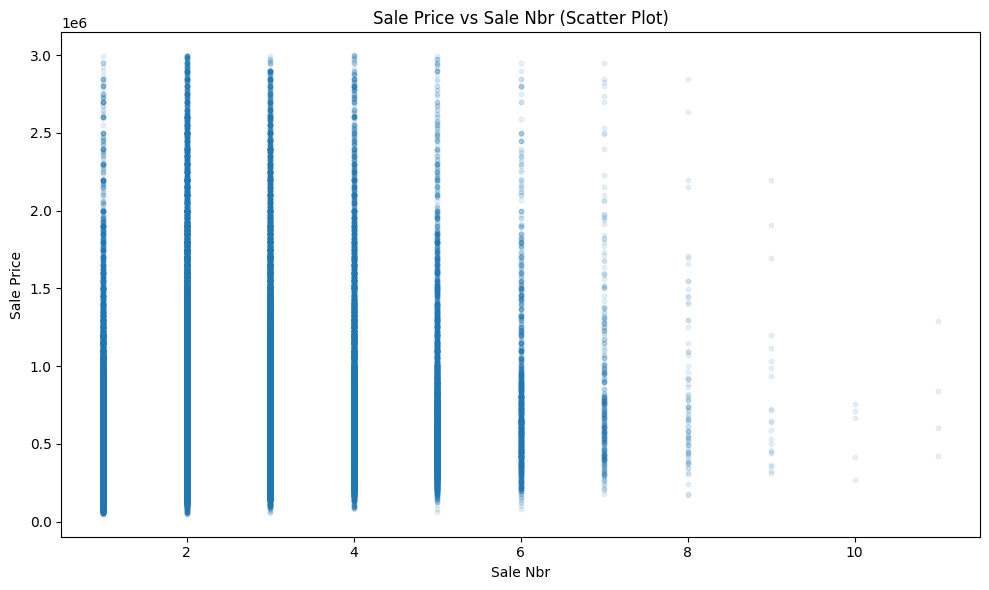

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(trans_data['sale_nbr'], trans_data['sale_price'], alpha=0.1, s=10)
plt.xlabel('Sale Nbr')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Sale Nbr (Scatter Plot)')
plt.tight_layout()
plt.show()


Biểu đồ cho thấy sale_nbr không tương quan mạnh với sale_price khi giá trị phân bổ với mật độ đày đặc và đa dạng ở mọi mức giá

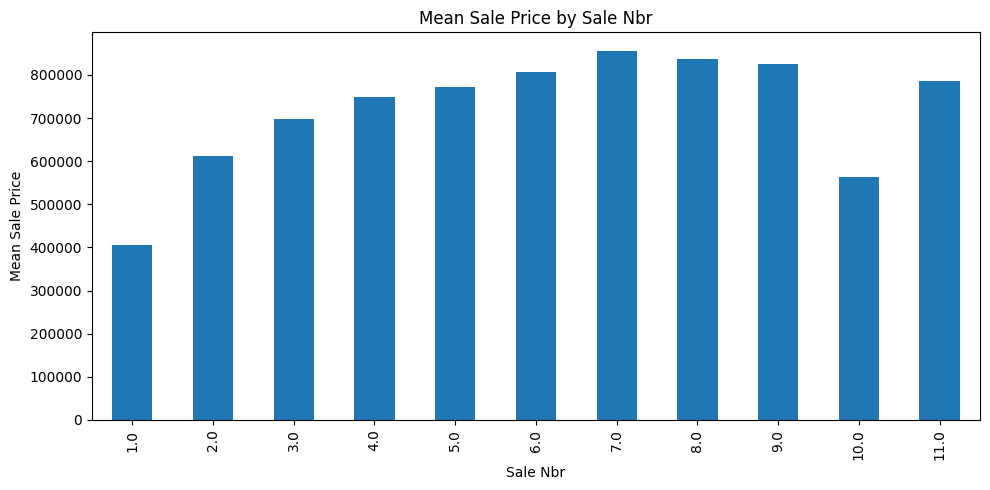

In [77]:

mean_price_by_nbr = trans_data.groupby('sale_nbr')['sale_price'].mean().sort_index()

plt.figure(figsize=(10, 5))
mean_price_by_nbr.plot(kind='bar')
plt.xlabel('Sale Nbr')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Sale Nbr')
plt.tight_layout()
plt.show()

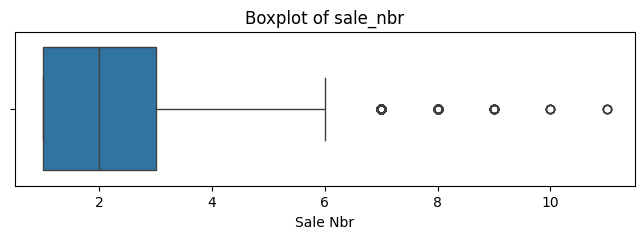

In [78]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=trans_data['sale_nbr'])
plt.title('Boxplot of sale_nbr')
plt.xlabel('Sale Nbr')
plt.show()


In [79]:

na_sale_nbr = trans_data[trans_data['sale_nbr'].isna()]
mean_price_na = na_sale_nbr['sale_price'].mean()
count_na = na_sale_nbr.shape[0]
print(f"Mean sale_price where sale_nbr is NaN: {mean_price_na:.2f}")
print(f"Count where sale_nbr is NaN: {count_na}")

Mean sale_price where sale_nbr is NaN: 596508.92
Count where sale_nbr is NaN: 42182


* **Về phân bổ giá trị**: Có thể thấy đặc trưng sale_nbr tồn tại rất ít giá trị ngoại lai, hầu hết giá trị đều nằm trong khoảng 1.0 - 4.0.
* **Về xu hướng giá trị**: Mặc dù không thể hiện quá rõ rệt từ biểu đồ cũng có thể thấy sale_nbr có tương quan thuận với sale_price, các giá trị sale_nbr >=9 có số lượng quá ít nên không ảnh hưởng tới kết luận trên. Ta có thể cân nhắc gom nhóm các giá trị sale_nbr lớn trước khi huấn luyện mô hình.
* **Về giá trị khuyết**: Đây là thuộc tính có số lượng rỗng nhiều nhất trong số các đặc trưng, chiếm khoảng 25% tổng số mẫu đồng thời cũng thể hiện tương quan khá với biến mục tiêu (0.28) vậy nên không thể loại bỏ thuộc tính này.

Quan sát cho thấy đối với các giá trị rỗng thì giá trị trung bình là ~600.000 $ gần với giá trị trung bình của các mẫu có sale_nbr=2, đồng thời median của sale_nbr cũng bằng 2, median ~2.1 &rarr; Ta có thể điền khuyết dữ liệu bằng cách lấy median là phù hợp nhất.

In [80]:
sale_nbr_meadian=trans_data['sale_nbr'].median()
trans_data.loc[:, 'sale_nbr'] = trans_data['sale_nbr'].fillna(sale_nbr_meadian)

**e) Sale_warning: số cảnh báo về giao dịch**

In [81]:
trans_data.loc[:, 'sale_warning'] = trans_data['sale_warning'].replace('   ', 'no_warning')

In [82]:
trans_data['sale_warning'].describe()

count         200000
unique           142
top       no_warning
freq          180689
Name: sale_warning, dtype: object

In [83]:
trans_data['sale_warning'].value_counts()

sale_warning
no_warning    180689
26              6831
15              3723
40              2235
41              1999
               ...  
 26 44             1
 15 92             1
 10 29 45          1
 15 24             1
 3 60              1
Name: count, Length: 142, dtype: int64

In [84]:
top8_warning = trans_data[trans_data['sale_warning'] != 'no_warning']['sale_warning'].value_counts().head(8).index
for warning in top8_warning:
    mean_val = trans_data[trans_data['sale_warning'] == warning]['sale_price'].mean()
    count_val = trans_data[trans_data['sale_warning'] == warning].shape[0]
    print(f"Warning: {warning!r} | Count: {count_val} | Mean sale_price: {mean_val:.2f}")

Nhìn chung đặc trưng này có rất ít mẫu có giá trị warning ~10%, khảo sát các giá trị warning cho thấy không có sự khác biệt quá đáng kể. Nên loại bỏ thuộc tính này khỏi quá trình huấn luyện.

**f) join_status: trạng thái thay đổi tài sản**

`join_year` là năm mà sự kiện trong `join_status` xảy ra, dựa trên việc so sánh các giao dịch của cùng một mẫu đất theo thời gian.

| `join_status`       | Ý nghĩa                                | `join_year` là gì?                                            |
|---------------------|-----------------------------------------|----------------------------------------------------------------|
| `new`               | Giao dịch lần đầu (tài sản mới)        | Năm giao dịch đầu tiên của thửa đất đó                         |
| `nochg`             | Không thay đổi                         | `NaN` hoặc cùng năm giao dịch                                  |
| `reno - before`     | Trước khi cải tạo                      | Năm mà lần cải tạo (sửa chữa) xảy ra                           |
| `reno - after`      | Sau khi cải tạo xong                   | Năm mà lần cải tạo hoàn tất (thường trùng với năm giao dịch)   |
| `rebuilt - before`  | Trước khi bị xây lại toàn bộ           | Năm sẽ xảy ra rebuild                                          |
| `rebuilt - after`   | Sau khi đã rebuild                     | Năm rebuild xong (tức là năm của giao dịch này)                |
| `demo`              | Sau đó tài sản bị phá dỡ               | Năm bị phá dỡ (demolished)                                     |
| `miss99`            | Không rõ                               | Không có hoặc không thể xác định được                          |


In [85]:
trans_data['join_status'].describe()

count     200000
unique         8
top        nochg
freq      126281
Name: join_status, dtype: object

In [86]:
trans_data['join_status'].value_counts()

join_status
nochg               126281
new                  53085
reno - before         5864
rebuilt - before      3706
rebuilt - after       3095
demo                  2869
reno - after          2632
miss99                2468
Name: count, dtype: int64

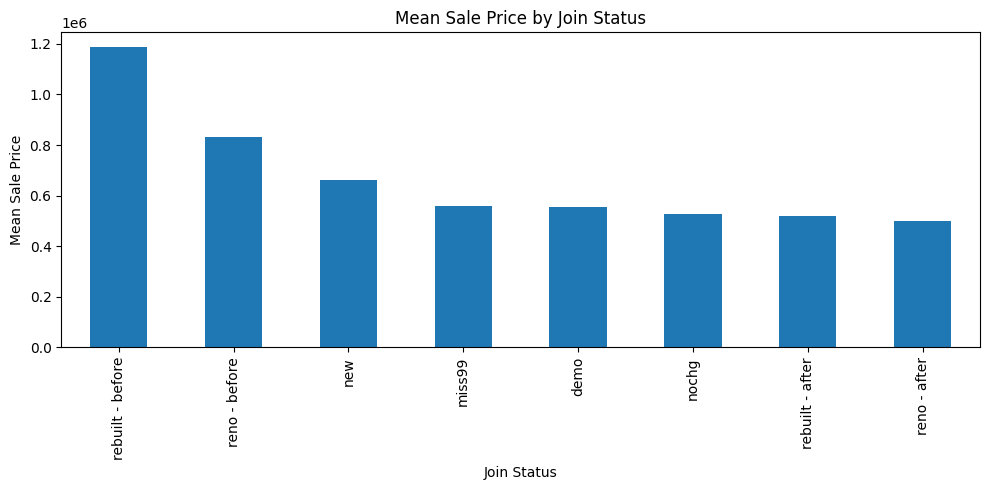

In [87]:
mean_by_join_status = trans_data.groupby('join_status')['sale_price'].mean().sort_values(ascending=False)
mean_by_join_status.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Join Status')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Join Status')
plt.tight_layout()
plt.show()

In [88]:
# Đếm số lượng mẫu theo join_status với sale_price > 2 triệu
high_price_counts = trans_data[trans_data['sale_price'] > 2_000_000]['join_status'].value_counts()
total_counts = trans_data['join_status'].value_counts()
percent_high_price = (high_price_counts / total_counts * 100).sort_values(ascending=False)

# In ra từng join_status: số lượng và phần trăm
for status in total_counts.index:
    count = high_price_counts.get(status, 0)
    percent = percent_high_price.get(status, 0)
    print(f"{status:18s} | Count: {count:5d} | Percent: {percent:6.2f}%")

nochg              | Count:  1170 | Percent:   0.93%
new                | Count:   939 | Percent:   1.77%
reno - before      | Count:   277 | Percent:   4.72%
rebuilt - before   | Count:   551 | Percent:  14.87%
rebuilt - after    | Count:    41 | Percent:   1.32%
demo               | Count:    57 | Percent:   1.99%
reno - after       | Count:    25 | Percent:   0.95%
miss99             | Count:    35 | Percent:   1.42%


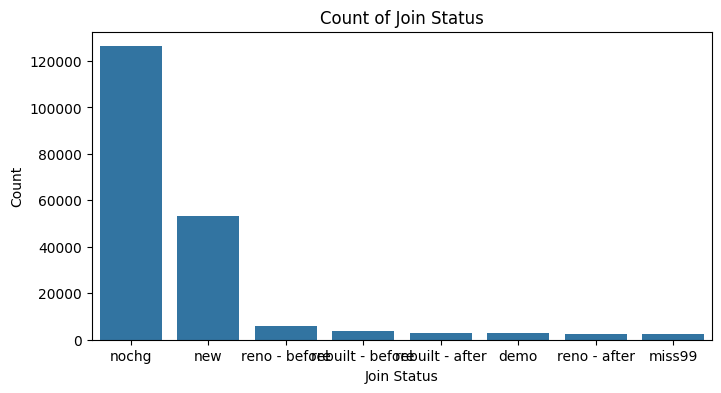

In [89]:
count_by_join_status=trans_data['join_status'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=count_by_join_status.index, y=count_by_join_status.values)
plt.title('Count of Join Status')
plt.xlabel('Join Status')
plt.ylabel('Count')
plt.show()

Quan sát các biểu đồ có thể thấy một số đặc điểm: 
* Nochag và new là hai giá trị phổ biến nhất của đặc trưng `join_status` với lần lượt ~126.000 và 53.000~ mẫu.
* Hầu hết các giá trị còn lại đều có mức phổ biến thấp hơn nhiều ~2000 &rarr; 5000 mẫu.
* Đặc biệt lưu ý đến hai giá trị làm tăng giá trị bất động sản ấn tượng hơn so với các giá trị còn lại là rebuilt-before với ~14% loại status này có giá trên 2.000.000 $ và reno-before với ~4.7%.
* Một số giá trị `join_status` có số lượng lẫn % nhỏ, có thể cân nhắc gom nhóm lại với nhau.

**g) join_year: Năm thực hiện thay đổi trạng thái bất động sản**

In [90]:
trans_data['join_year'].describe()

count    200000.000000
mean       2023.403600
std           6.241643
min        1999.000000
25%        2025.000000
50%        2025.000000
75%        2025.000000
max        2025.000000
Name: join_year, dtype: float64

Cân nhắc chuyển về dạng dữ liệu datetime để dễ dàng phân tích theo năm, tháng, ngày

In [91]:
trans_data['join_year'].value_counts()

join_year
2025    187720
1999     12280
Name: count, dtype: int64

Đặc trưng này không tồn tại khuyết dữ liệu đồng thời có thể thấy chỉ có hai giá trị thực hiện thay đổi trạng thái là 2025 và 1999.

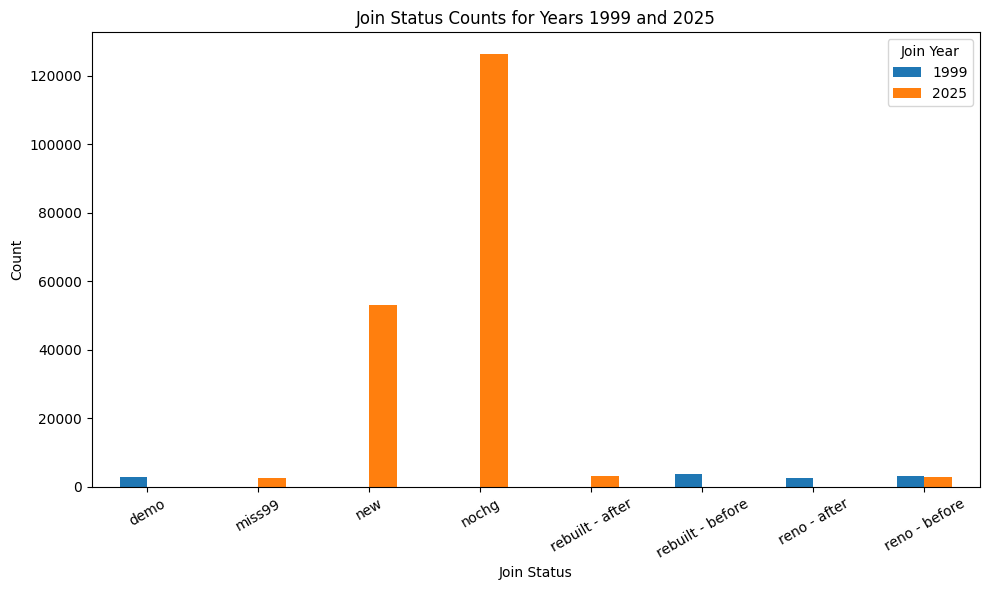

In [92]:
# Đếm số lượng join_status cho hai năm 1999 và 2025
years_of_interest = data['join_year'].value_counts().index[data['join_year'].value_counts().index.isin([1999, 2025])]
join_status_counts = (
    data[data['join_year'].isin(years_of_interest)]
    .groupby(['join_year', 'join_status'])
    .size()
    .unstack(fill_value=0)
    .T
)

# Vẽ biểu đồ cột đôi
join_status_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Join Status Counts for Years 1999 and 2025')
plt.xlabel('Join Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Join Year')
plt.tight_layout()
plt.show()

* 2025 có nhiều tài sản mới (new) và ổn định (nochg), chiếm đa số.

* 1999 chủ yếu là các tài sản đang cải tạo, xây lại hoặc phá dỡ (reno, rebuilt, demo).

* miss99 chỉ xuất hiện ở 2025, có thể là dữ liệu bị thiếu.

&rarr; Điều này cho thấy năm 2025 là thời điểm thị trường ổn định hơn, còn 1999 là giai đoạn nhiều thay đổi tài sản.

## III. Nhóm đặc trưng về địa lý <a id="iii"></a>

**a) Các đặc trưng địa lý**

| Tên đặc trưng | Mô tả |
| - | - |
|`latitude` | Vĩ độ căn nhà |
|`longitude` | Kinh độ căn nhà |
| `city` | Thành phố |
| `zoning` | Mã phân vùng quy định sử dụng đất |
| `subdivision` | Tên khu dân cư |
| `land_val` | Giá trị đất thẩm định |
| `imp_val` | Giá trị tổng thể (bao gồm cả đất) |
| `sqft_lot` | Diện tích lô đất |

Đây là các đặc trưng mà em xem là liên quan tới địa lý.

In [93]:
geography_data = data[['latitude', 'longitude', 'city', 'zoning', 'subdivision', 'land_val', 'imp_val', 'sqft_lot']]
geography_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     200000 non-null  float64
 1   longitude    200000 non-null  float64
 2   city         200000 non-null  object 
 3   zoning       200000 non-null  object 
 4   subdivision  182450 non-null  object 
 5   land_val     200000 non-null  int64  
 6   imp_val      200000 non-null  int64  
 7   sqft_lot     200000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 12.2+ MB


> Như chúng ta có thể thấy, data đã khá clean.  
> Chỉ có mỗi trường giá trị `subdivision` có các giá trị null, do đó tạm thời ta sẽ giữ nguyên dữ liệu.

**b) Phân phối số lượng nhà ở các thành phố**

Ta kiểm tra phân phối của số lượng nhà ở các thành phố.

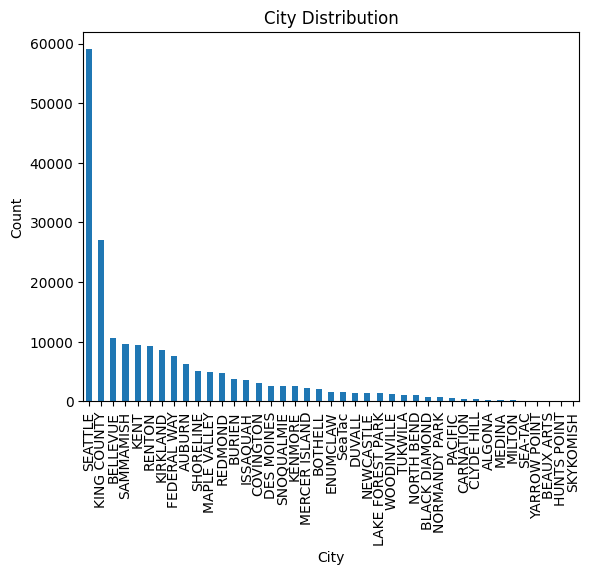

In [94]:
geography_data["city"].value_counts().plot(kind="bar")
plt.title("City Distribution")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

- Phân bố rất không đều

    - SEATTLE chiếm áp đảo với số lượng bất động sản vượt trội – hơn 60,000.

    - Thành phố đứng thứ 2 (KING COUNTY) cũng cao nhưng đã thấp hơn đáng kể (~27,000).

    - Các thành phố còn lại tụt rất nhanh → biểu hiện rõ phân bố lệch phải (right-skewed).

- Một số thành phố có số lượng trung bình (~5k–10k)

    - Các thành phố như BELLEVUE, RENTON, KENT, AUBURN, FEDERAL WAY có số lượng tương đối đáng kể, là những khu vực phát triển vệ tinh quanh Seattle.

- Đa phần các thành phố còn lại có số lượng thấp

    - Phía bên phải biểu đồ, hầu hết thành phố có dưới 1,000 căn nhà.

    - Nhiều thành phố có số lượng rất nhỏ (dưới 100), ví dụ: YARROW POINT, SKYKOMISH, HUNTS POINT...

**c) Phân phối giá trị đất ở các thành phố**

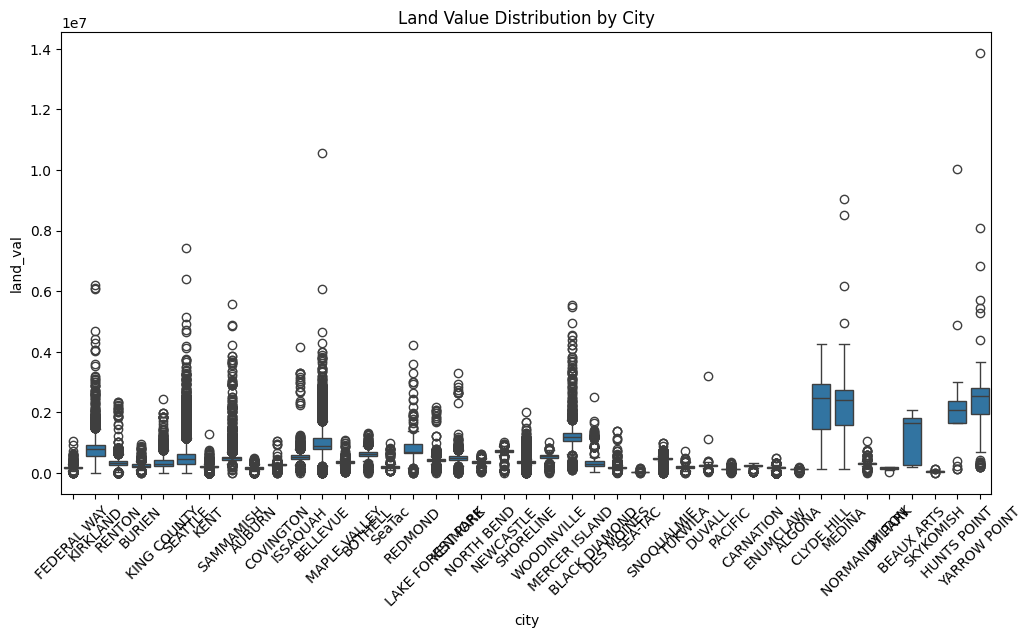

In [95]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=geography_data, x="city", y="land_val")
plt.xticks(rotation=45)
plt.title("Land Value Distribution by City")
plt.show()


- Nhóm thành phố có giá đất rất cao

    - Yarrow Point, Medina, Beaux Arts, Hunts Point, Clyde Hill:

    - Median và Q3 đều rất cao → khu vực cao cấp.

    - Rất nhiều outlier → có những lô đất cực kỳ đắt đỏ (cao hơn 10 triệu).

    - Các thành phố này thường là khu biệt thự ven hồ hoặc giàu có (thuộc khu King County).

- Nhóm thành phố tầm trung

    - Seattle, Bellevue, Redmond, Mercer Island:

    - Có median tương đối cao.

    - Phân phối rộng, nhiều outlier → biểu thị sự đa dạng loại hình nhà đất.

    - Là khu vực trung tâm đô thị hoặc khu công nghệ cao (Bellevue – Microsoft HQ).

- Nhóm thành phố có giá thấp hoặc ít biến động

    - Kent, Auburn, Federal Way, Renton, Tukwila:

    - Median thấp, ít outlier → giá đất rẻ và ít dao động.

    - Có thể là khu công nghiệp, vùng dân cư ngoại ô.

**c) Tương quan giữa giá trị nhà, giá trị đất và diện tích đất**

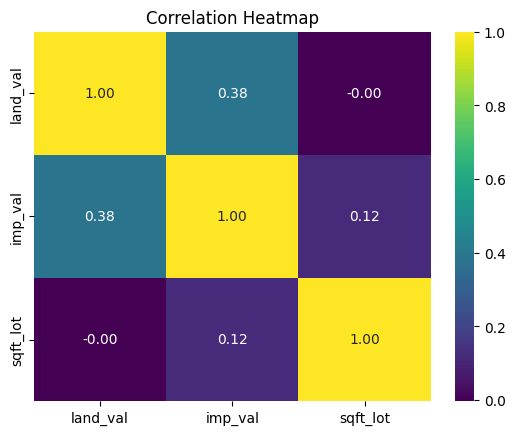

In [96]:
corr_cols = ["land_val", "imp_val", "sqft_lot"]
sns.heatmap(geography_data[corr_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- land_val có mối liên hệ vừa phải với imp_val, cho thấy các khu vực đắt đỏ thường có nhà trị giá cao hơn.

- Tuy nhiên, diện tích (sqft_lot) không quyết định rõ ràng đến giá trị đất hoặc nhà — giá trị có thể phụ thuộc nhiều vào vị trí, quy hoạch, zoning, tiện ích xung quanh,... hơn là diện tích thuần túy.

**d) Trực quan và gom nhóm các điểm có giá trị trung bình $m^2$ cao.**

Giờ ta sẽ kiểm tra xem những nơi nào có giá trị trung bình trên $m^2$ cao tập trung ở đâu.

In [ ]:
import folium
from folium.plugins import HeatMap

# Tính giá trị trung bình mỗi foot vuông
geography_data["val_per_sqft"] = geography_data["land_val"] / geography_data["sqft_lot"]

valid_data = geography_data[["latitude", "longitude", "val_per_sqft", "subdivision", "city"]]

# Phân vị 75%
threshold = valid_data["val_per_sqft"].quantile(0.75)

# Phân tách dữ liệu
hot_data = valid_data[valid_data["val_per_sqft"] > threshold]
normal_data = valid_data[valid_data["val_per_sqft"] <= threshold]

# Tạo list điểm cho heatmap
all_points = normal_data[["latitude", "longitude", "val_per_sqft"]].values.tolist()
hot_points = hot_data[["latitude", "longitude", "val_per_sqft"]].values.tolist()

# Tâm bản đồ
map_center = [valid_data["latitude"].mean(), valid_data["longitude"].mean()]
base_map = folium.Map(location=map_center, zoom_start=10)

# Lớp 1: heatmap toàn bộ (nhẹ)
HeatMap(all_points, radius=10, blur=15, max_zoom=13, gradient={0.4: 'blue', 0.65: 'lime', 1: 'yellow'}, min_opacity=0.3).add_to(base_map)

# Lớp 2: heatmap các điểm giá cao (nổi bật)
HeatMap(hot_points, radius=10, blur=15, max_zoom=13, gradient={0.4: 'orange', 0.7: 'red', 1: 'darkred'}, min_opacity=0.6).add_to(base_map)

from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(base_map)

for _, row in hot_data.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"val_per_sqft: {row['val_per_sqft']:.2f}"
    ).add_to(marker_cluster)

base_map

- Ta có thể thấy các nơi có giá trị trung bình trên $m^2$ cao tập trung ở Tây Bắc của Thành Phố Seattle.

- Đa số các những khu vực đỏ đều có tầm nhìn ra sông/hồ/biển hoặc gần các công trình công cộng.

In [ ]:
# Gom nhóm theo subdivision và city cho các điểm nóng (hot_data)
hot_grouped = hot_data.groupby(["subdivision", "city"]).agg({
    "val_per_sqft": ["mean", "max", "count"]
}).reset_index()

# Đổi tên cột cho dễ đọc
hot_grouped.columns = ["subdivision", "city", "mean_val_per_sqft", "max_val_per_sqft", "count"]

# Sắp xếp giảm dần theo giá trị trung bình
hot_grouped = hot_grouped.sort_values(by="mean_val_per_sqft", ascending=False)

# Hiển thị top 10 khu vực đắt nhất
print(hot_grouped.head(10))


- Các khu vực cao giá nhất có giá vượt trội:

    - PHILLIPS ADD TO YARROW (Yarrow Point) và DENNY FUHRMAN W BLK 35 (Seattle) đều có giá trung bình trên $785/ft², vượt xa các khu vực còn lại.

    - Đặc biệt, Yarrow Point là một trong những khu dân cư cao cấp và khép kín nhất của King County, nổi tiếng với nhà ven hồ và tính riêng tư — điều này lý giải cho mức giá rất cao dù chỉ có 1 mẫu.

- Bellevue chiếm nhiều vị trí trong top 10:

    - Có 3 khu vực ở Bellevue: LOCKWOOD, 1200 BELLEVUE WAY, DOGWOOD LANE PUD — tất cả đều có mean_val_per_sqft trên $700.

    - Bellevue là một trung tâm công nghệ phát triển nhanh, gần Microsoft, Amazon, Google,... và có chất lượng sống cao nên giá đất đắt là hợp lý.

- Một số subdivision chỉ có 1–2 mẫu (sample size nhỏ):
    
    - Ví dụ:

        - PHILLIPS ADD TO YARROW: 1 mẫu

        - DOGWOOD LANE PUD: 2 mẫu

        - SAMMAMISH SPRINGS ADD: 1 mẫu

    - Điều này có thể giới hạn độ tin cậy thống kê nếu muốn suy luận tổng thể từ dữ liệu này.

- Seattle có mặt nhiều lần, nhưng giá không cao nhất:

    - Một số subdivision như HALLS ADD TO SEATTLE, QUEEN ADD, HOWELL TOWNHOMES đều ở Seattle, nhưng giá dao động từ $565–$699/ft².

    - Điều này phản ánh sự đa dạng về giá trong nội đô, tùy thuộc vào vị trí cụ thể và phân vùng sử dụng đất.

## III. Nhóm đặc trưng về  <a id="iii"></a>   -- Nghĩa

## VII. Nhóm đặc trưng về cấu trúc và số phòng  <a id="vii"></a> 

In [98]:
struct_room_data= data[['condition','stories','beds','bath_full','bath_3qtr','bath_half']]
test_struct_room_data = test_data[['condition','stories','beds','bath_full','bath_3qtr','bath_half']]

**a) Kiểm tra dữ liệu thiếu**

In [99]:
struct_room_data.isnull().sum()

condition    0
stories      0
beds         0
bath_full    0
bath_3qtr    0
bath_half    0
dtype: int64

In [100]:
test_struct_room_data.isnull().sum()

condition    0
stories      0
beds         0
bath_full    0
bath_3qtr    0
bath_half    0
dtype: int64

- Dữ liệu ở các đặc trưng này đầy đủ.

**b) Kiểu dữ liệu của các đặc trưng**

In [101]:
struct_room_data.dtypes

condition      int64
stories      float64
beds           int64
bath_full      int64
bath_3qtr      int64
bath_half      int64
dtype: object

- Dựa vào ý nghĩa của các đặc trưng thì ta sẽ chọn kiểu dữ liệu của các đặc trưng này như sau:
    - category: `condtion`.
    - numeric: `stories`, `beds`, `bath_full`, `bath_3qtr`, `bath_half`.

$\rightarrow$ Ta sẽ ép kiểu tương ứng cho các đặc trưng này. Riêng `stories` vẫn giữ **float64** vì dữ liệu có chứa số thập phân.

In [102]:
struct_room_data=struct_room_data.copy()
struct_room_data['condition'] = struct_room_data['condition'].astype('category')


struct_room_data.dtypes

condition    category
stories       float64
beds            int64
bath_full       int64
bath_3qtr       int64
bath_half       int64
dtype: object

In [103]:
test_struct_room_data=test_struct_room_data.copy()
test_struct_room_data['condition'] = test_struct_room_data['condition'].astype('category')

test_struct_room_data.dtypes

condition    category
stories       float64
beds            int64
bath_full       int64
bath_3qtr       int64
bath_half       int64
dtype: object

**c) Thống kê mô tả**

**Dữ liệu numeric:`stories`, `beds`, `bath_full`, `bath_3qtr`, `bath_half`**

In [104]:
struct_room_data.select_dtypes(exclude=['category']).describe()

,stories,beds,bath_full,bath_3qtr,bath_half
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.523778,3.419390,1.579735,0.494115,0.493020
std,0.526367,0.897639,0.672685,0.638183,0.525635
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,0.000000
50%,1.500000,3.000000,2.000000,0.000000,0.000000
75%,2.000000,4.000000,2.000000,1.000000,1.000000
max,4.500000,14.000000,9.000000,8.000000,12.000000


**Dữ liệu catogory: `condition`**

In [105]:
def summary_category(df):
    categorical_cols = df.select_dtypes(include='category').columns
    summary={}
    for col in categorical_cols:
        num_value = df[col].nunique()
        ratios = (df[col].value_counts(normalize=True) * 100).round(1).to_dict()

        summary[col] = {
            'num_value': num_value,
            'value_ratios': ratios
        }
    summary_df = pd.DataFrame(summary)
    return summary_df

In [106]:
summary_category(struct_room_data)

,condition
num_value,5
value_ratios,"{3: 58.8, 4: 29.1, 5: 11.6, 2: 0.4, 1: 0.1}"


**d) Phân phối**

**Dữ liệu numeric:`stories`, `beds`, `bath_full`, `bath_3qtr`, `bath_half`**

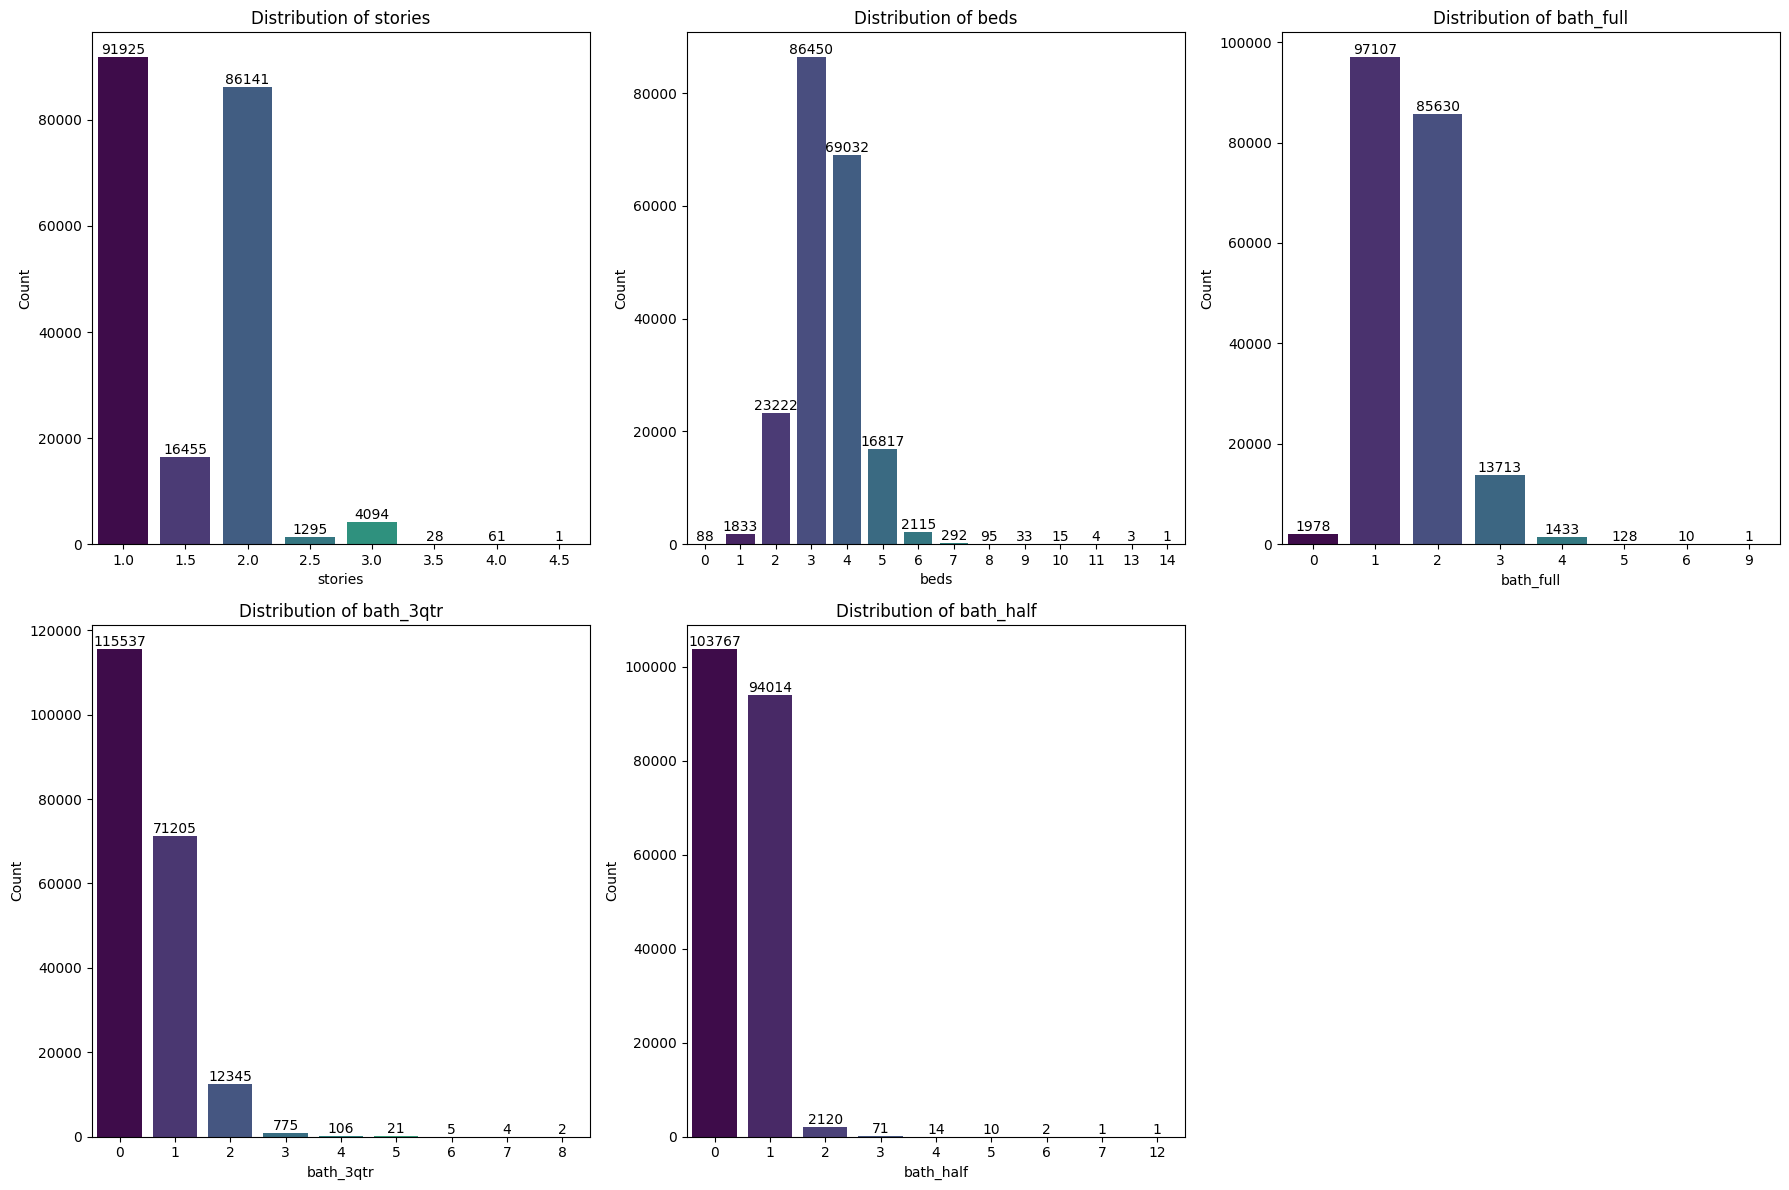

In [107]:
numeric_cols = ['stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half']


plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=struct_room_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Dựa vào thống kê mô tả và phân phối:    
    - Với `stories`, các giá trị `1`, `1.5`, `2` chiếm hầu hết trong dữ liệu.
    - Với `beds`, có các giá trị lớn từ `8` đến `14` nhưng phần lớn dữ liệu tập trung ở các giá trị từ `2` đến `5`.  
    - Xét `bath_full`, dữ liệu tập trung chủ yếu ở `1`, `2`, `3` nhưng vẫn có tồn tại giá trị lớn `9`.
    - Xét `bath_3qtr`, các giá trị chủ yếu là `0`, `1`, `2` đồng thời vẫn có số ít giá trị lớn như `5` đến `8`.
    - Xét `bath_half`, tương tự `bath_3qtr` thì chủ yếu là `0`, `1`, `2` và cũng có các giá trị lớn, đặc biệt là `12`.
    - Cả 5 đặc trưng này đều xu hướng lệch phải, đều có nguy cơ chứa giá trị ngoại lai. Ta sẽ xem xét với dữ liệu test như thế nào.

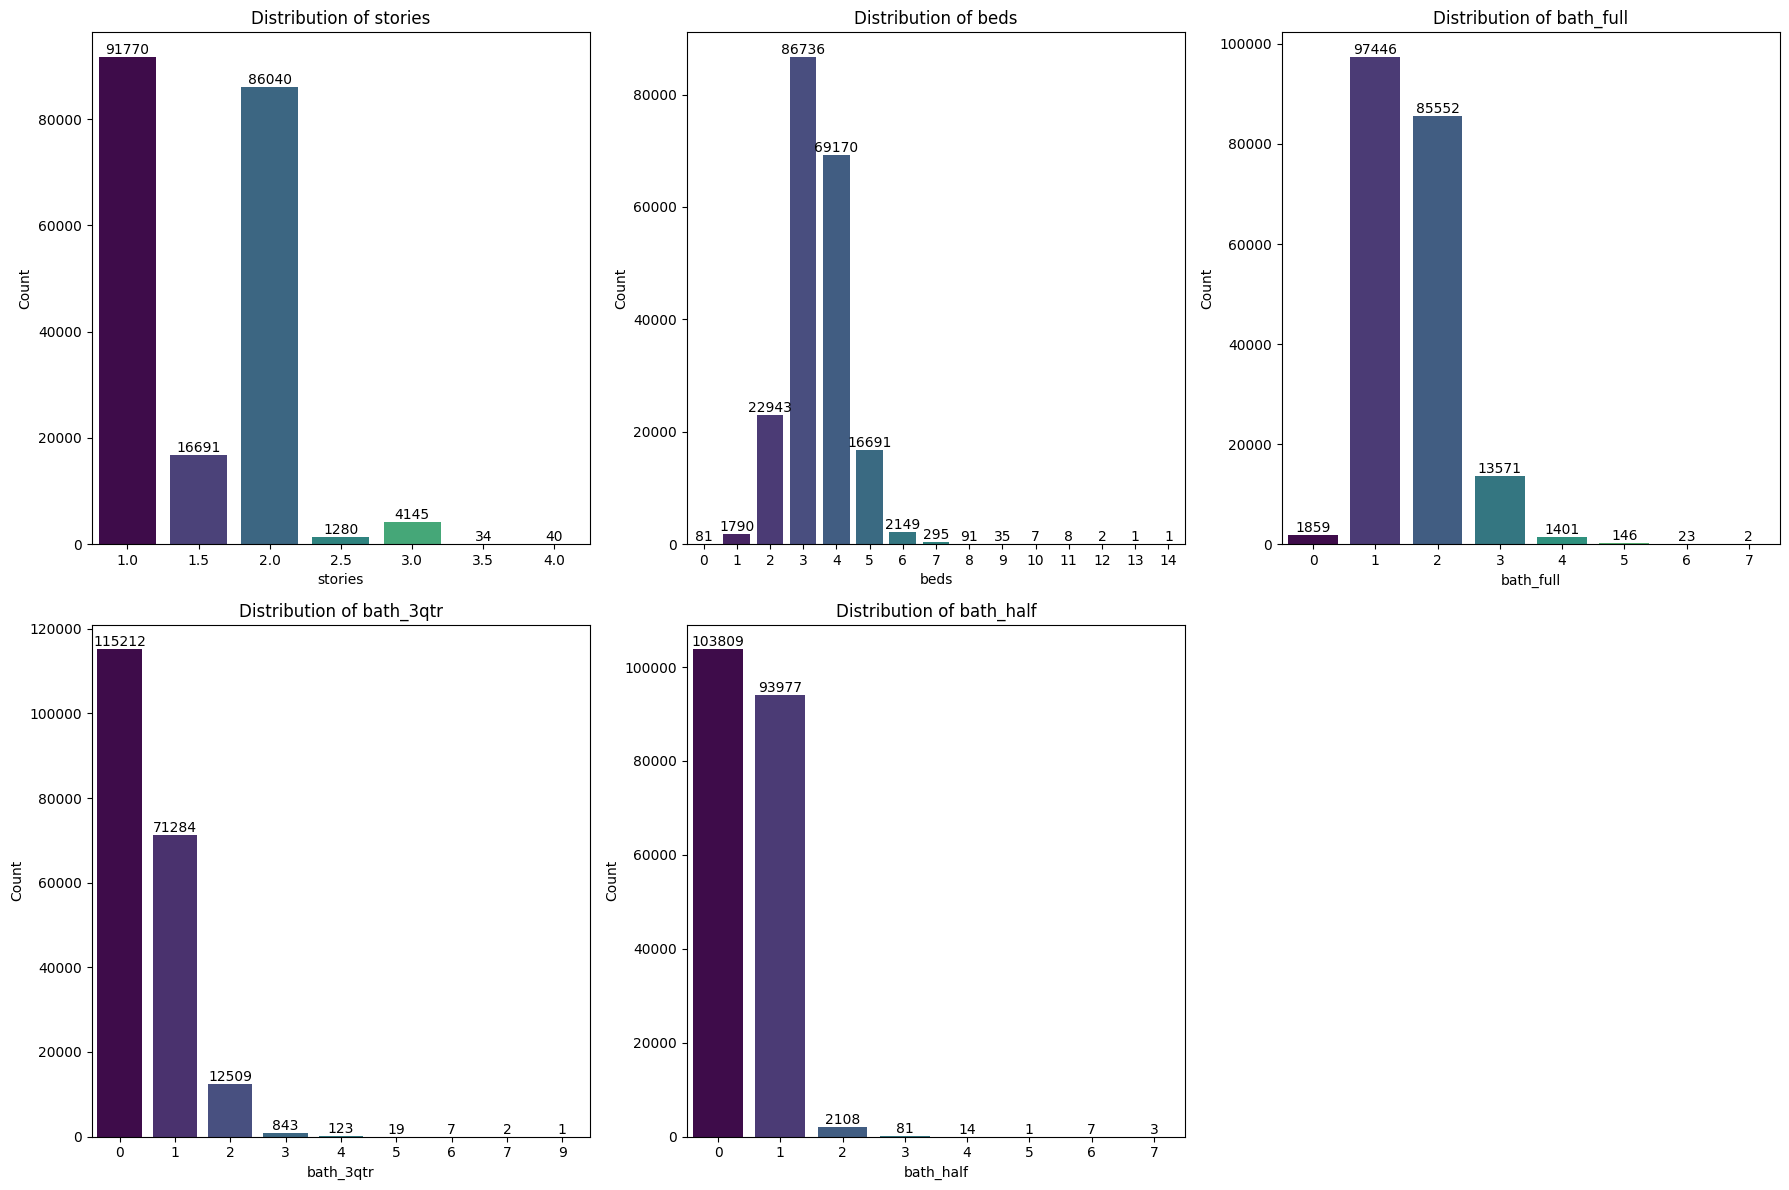

In [108]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=test_struct_room_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Dữ liệu của train và dữ liệu của test khá tương đồng nhau do đó không cần xử lý outlier.

**Dữ liệu catogory: `condition`**

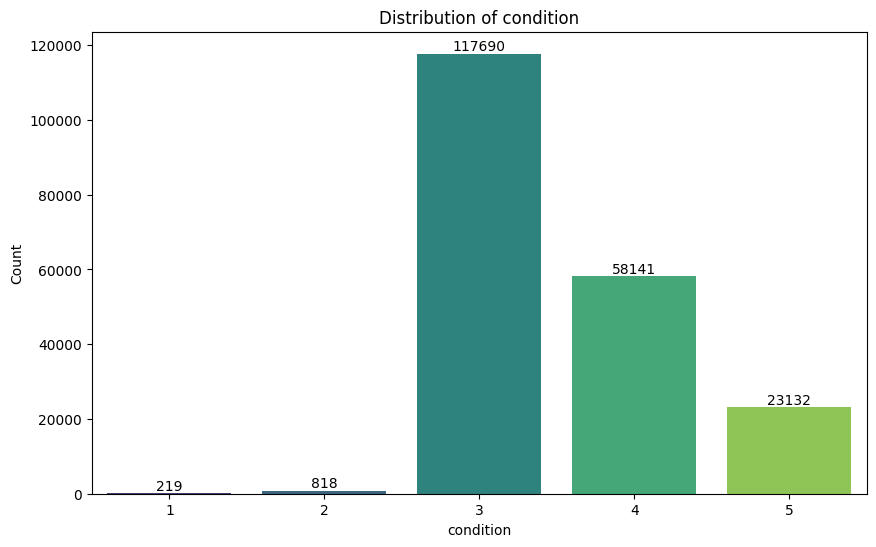

In [109]:
catogory_cols = ['condition']

plt.figure(figsize=(10, 6))
for i, col in enumerate(catogory_cols):
    plt.subplot(1, 1, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=struct_room_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

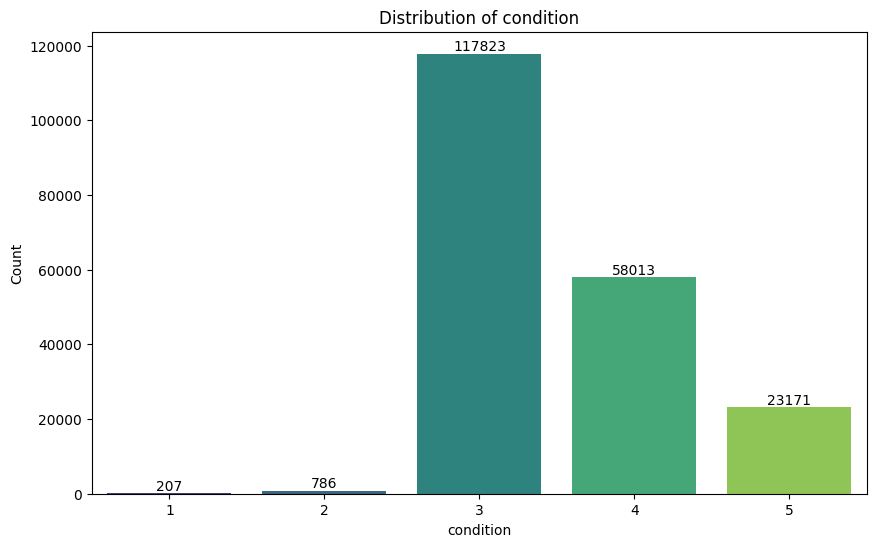

In [110]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(catogory_cols):
    plt.subplot(1, 1, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=test_struct_room_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

- Cả dữ liệu train và dữ liệu test, phần lớn là giá trị `3`, `4` và `5` và một số ít là `1` và `2`.

## VIII. Nhóm đặc trưng về gara và không gian phụ trợ  <a id="viii"></a> 

In [111]:
gara_room= data[['garb_sqft','gara_sqft']]
test_gara_room= test_data[['garb_sqft','gara_sqft']]

**a) Kiểm tra dữ liệu thiếu**

In [112]:
gara_room.isnull().sum()

garb_sqft    0
gara_sqft    0
dtype: int64

In [113]:
test_gara_room.isnull().sum()

garb_sqft    0
gara_sqft    0
dtype: int64

- Dữ liệu ở các đặc trưng này đầy đủ. 

**b) Kiểu dữ liệu của các đặc trưng**

In [114]:
gara_room.dtypes

garb_sqft    int64
gara_sqft    int64
dtype: object

- Theo ý nghĩa của đặc trưng này thì hai đặc trưng này mang kiểu `numeric` và liên tục do đó ép kiểu sang `float64`.

In [115]:
gara_room= gara_room.copy()

gara_room['garb_sqft'] = gara_room['garb_sqft'].astype('float64')
gara_room['gara_sqft'] = gara_room['gara_sqft'].astype('float64')
gara_room.dtypes

garb_sqft    float64
gara_sqft    float64
dtype: object

In [116]:
test_gara_room= test_gara_room.copy()
test_gara_room['garb_sqft'] = test_gara_room['garb_sqft'].astype('float64')
test_gara_room['gara_sqft'] = test_gara_room['gara_sqft'].astype('float64')
test_gara_room.dtypes

garb_sqft    float64
gara_sqft    float64
dtype: object

**c) Thống kê mô tả**

In [117]:
gara_room.describe()

,garb_sqft,gara_sqft
count,200000.00000,200000.000000
mean,80.32632,274.151470
std,180.13173,288.338763
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,240.000000
75%,0.00000,480.000000
max,12740.00000,4404.000000


**d) Phân phối**

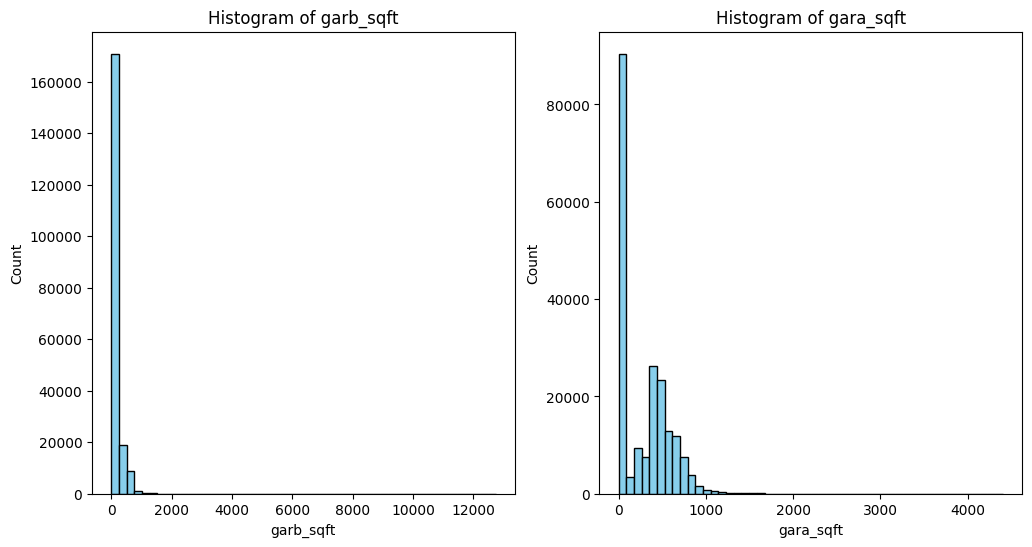

In [118]:
gara_cols=['garb_sqft', 'gara_sqft']

plt.figure(figsize=(12, 6))
for i, col in enumerate(gara_cols):
    plt.subplot(1, 2, i + 1)
    plt.hist(gara_room[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

- Dựa vào thống kê mô tả và phân phối:
    - Đối với `garb_sqft`, dữ liệu lệch phải rất nặng. Dựa vào thống kê mô tả ở trên, tứ phân vị thứ 3 có giá trị 0, cho thấy phần lớn dữ liệu ở đặc trưng này là `0`.
    - Đối với `gara-sqft`, dữ liệu cũng lệch phải nặng nhưng nhẹ hơn so với `garb_sqft`. Tứ phân vị thứ 1 có giá trị 0 và trung vị có giá trị 240 do đó dữ liệu đặc trưng này đa dạng hơn.
- Ta sẽ so sánh với dữ liệu test.

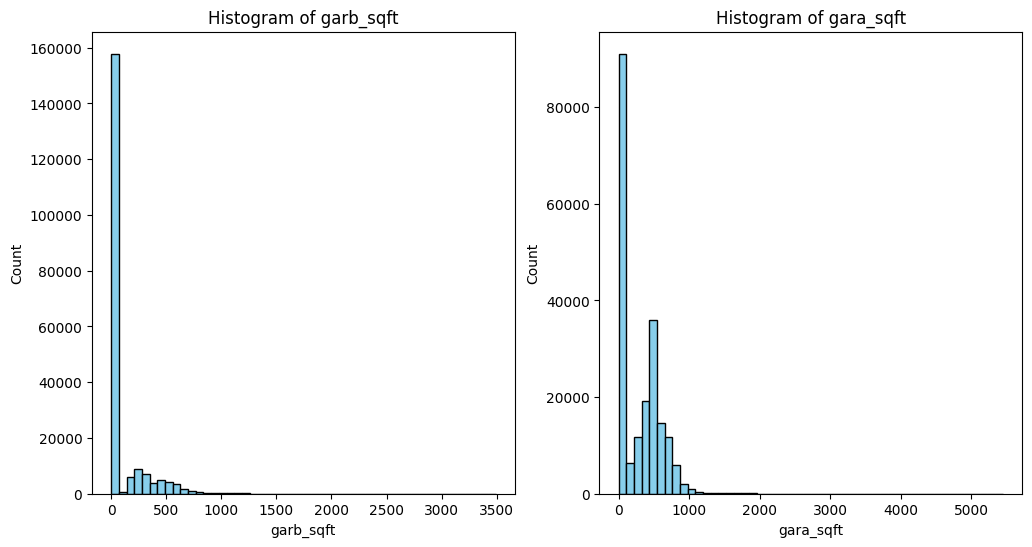

In [119]:
gara_cols=['garb_sqft', 'gara_sqft']

plt.figure(figsize=(12, 6))
for i, col in enumerate(gara_cols):
    plt.subplot(1, 2, i + 1)
    plt.hist(test_gara_room[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

- Đối với đặc trưng `gara_sqft`, phân phối của train và test tương đồng nhau do đó không cần xử lý gì ở đặc trưng.
- Đối với đặc trưng `garb_sqft`, phân phối của train lệnh phải nặng hơn so với phân phối của test. Ngoài ra ở dữ liệu train, giá trị max rất lớn so với dữ liệu test do đó ta sẽ giới hạn trên cho dữ liệu train để tránh ngoại lai.

## IX. Nhóm đặc trưng về môi trường  <a id="ix"></a> 

In [120]:
env_data=data[['wfnt','golf','greenbelt','noise_traffic']]
test_env_data=test_data[['wfnt','golf','greenbelt','noise_traffic']]

**a) Kiểm tra dữ liệu thiếu**

In [121]:
env_data.isnull().sum()

wfnt             0
golf             0
greenbelt        0
noise_traffic    0
dtype: int64

In [122]:
test_env_data.isnull().sum()

wfnt             0
golf             0
greenbelt        0
noise_traffic    0
dtype: int64

- Dữ liệu ở các đặc trưng này đầy đủ.

**b) Kiểu dữ liệu của các đặc trưng**

In [123]:
env_data.dtypes

wfnt             int64
golf             int64
greenbelt        int64
noise_traffic    int64
dtype: object

- Theo ý nghĩa của các đặc trưng này thì các đặc trưng này có kiểu `category`. Cụ thể:
    - `ordinal`: `wfnt`, `noise_traffic`.
    - `boolean`: `golf`, `greenbelt`.

$\rightarrow$ Ta sẽ ép kiểu phù hợp cho các đặc trưng này.

In [124]:
env_data=env_data.copy()
env_data['wfnt'] = env_data['wfnt'].astype('category')
env_data['noise_traffic'] = env_data['noise_traffic'].astype('category')
env_data['golf'] = env_data['golf'].astype('category')
env_data['greenbelt'] = env_data['greenbelt'].astype('category')
env_data.dtypes

wfnt             category
golf             category
greenbelt        category
noise_traffic    category
dtype: object

In [125]:
test_env_data=test_env_data.copy()
test_env_data['wfnt'] = test_env_data['wfnt'].astype('category')
test_env_data['noise_traffic'] = test_env_data['noise_traffic'].astype('category')
test_env_data['golf'] = test_env_data['golf'].astype('category')
test_env_data['greenbelt'] = test_env_data['greenbelt'].astype('category')
test_env_data.dtypes

wfnt             category
golf             category
greenbelt        category
noise_traffic    category
dtype: object

**c) Thống kê mô tả**

In [126]:
summary_category(env_data)

,wfnt,golf,greenbelt,noise_traffic
num_value,9,2,2,4
value_ratios,"{0: 98.8, 8: 0.4, 3: 0.2, 9: 0.2, 6: 0.2, 7: 0...","{0: 99.4, 1: 0.6}","{0: 96.6, 1: 3.4}","{0: 86.5, 1: 7.9, 2: 4.9, 3: 0.7}"


**d) Phân phối**

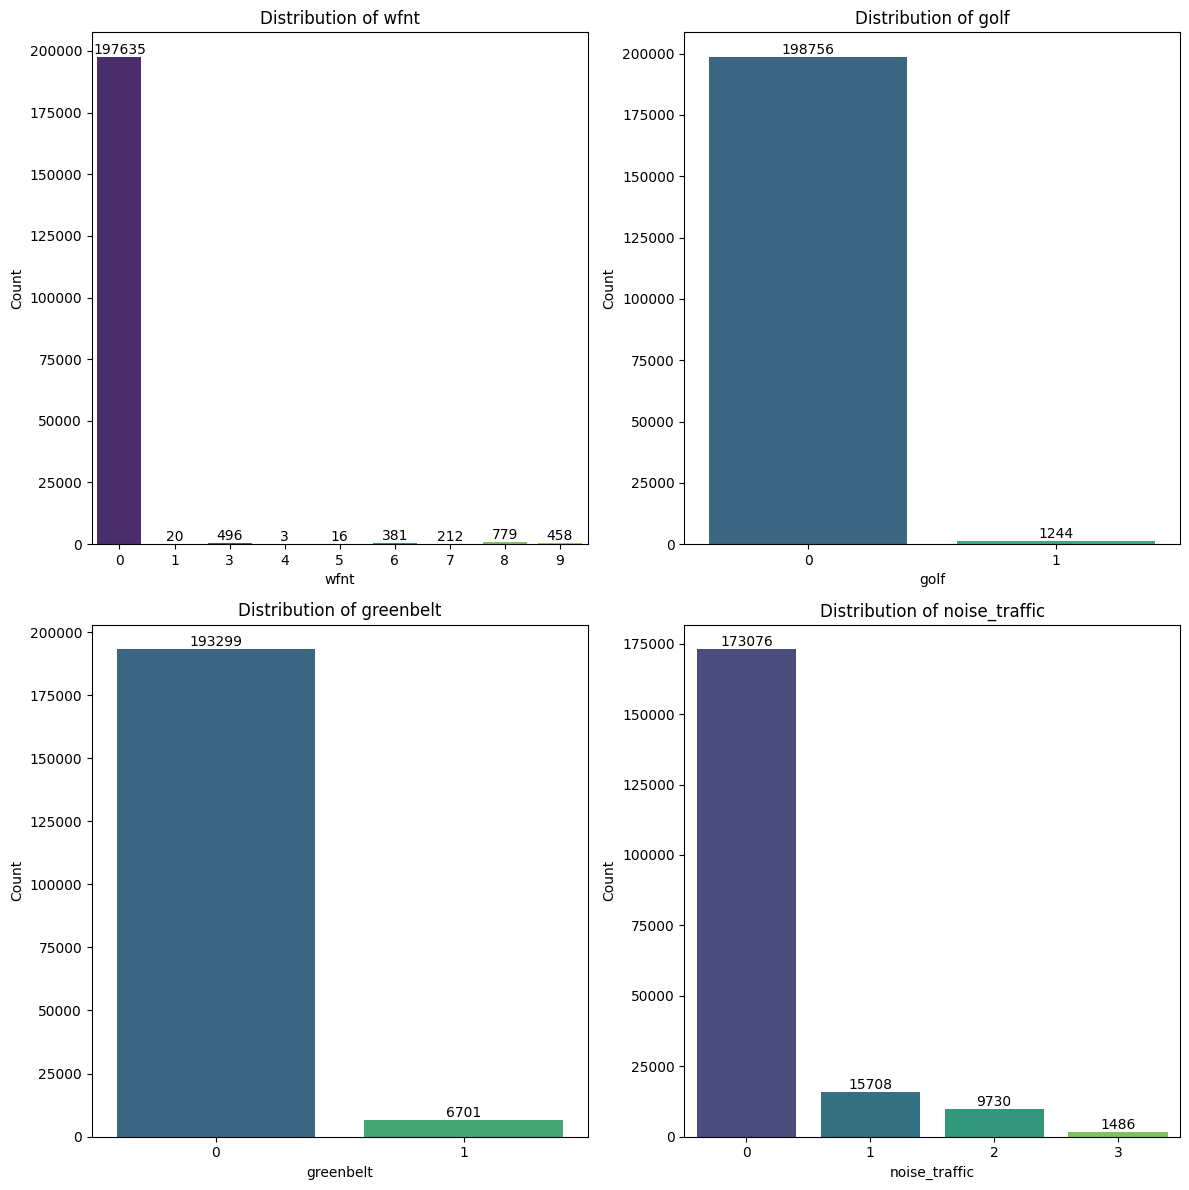

In [127]:
env_cols= ['wfnt', 'golf', 'greenbelt', 'noise_traffic']
plt.figure(figsize=(12, 12))

for i, col in enumerate(env_cols):
    plt.subplot(2, 2, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=env_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Dựa vào thống kế mô tả và phân phối:
    - Với dữ liệu của đặc trung `wfnt`, dữ liệu có giá trị trải rộng từ `0` đến `9` tuy nhiên giá trị `0` chiếm hầu hết dữ liệu (chiếm 98.8%).
    - Với dữ liệu của đặc trưng `golf`, dữ liệu có 2 giá trị `0` và `1` nhưng giá trị `0` chiếm đến **99.4%**.
    - Với dữ liệu của đặc trưng `greenbelt`, tương tự với `golf` có 2 giá trị `0` và `1`nhưng giá trị `0` chiếm đến **96.6%**.
    - Với dữ liệu của đặc trưng `noise_traffic`, có giá trị từ `0` đến `3`. Các giá trị trong dữ liệu đa dạng hơn nhưng `0` vẫn chiếm ưu thế là **86.5%**.
- Ta sẽ so sánh với dữ liệu test.

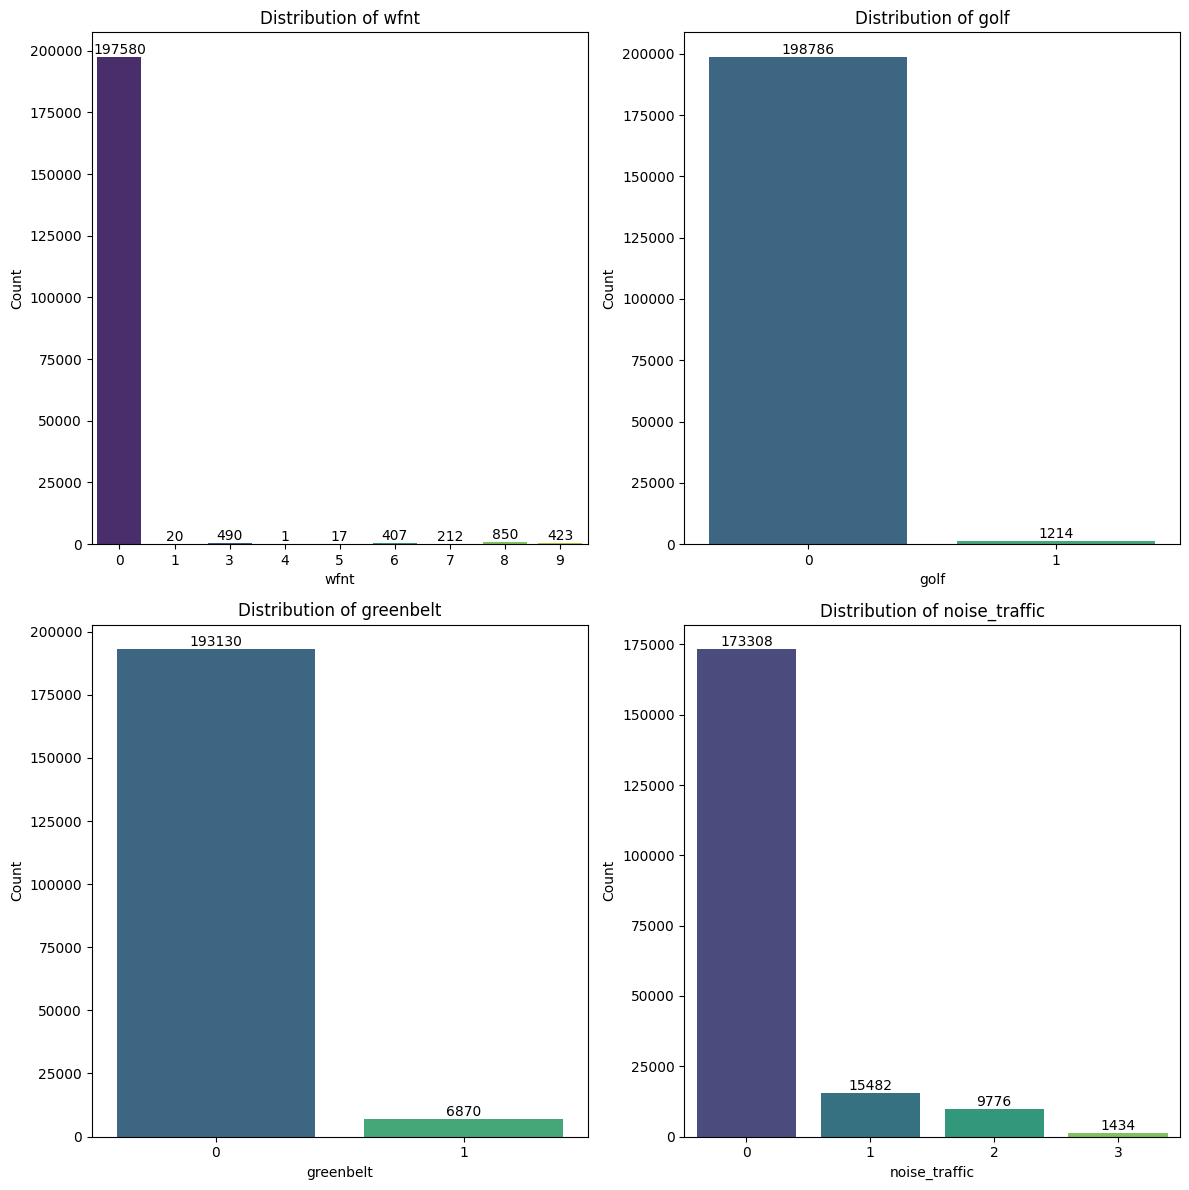

In [128]:
env_cols= ['wfnt', 'golf', 'greenbelt', 'noise_traffic']
plt.figure(figsize=(12, 12))

for i, col in enumerate(env_cols):
    plt.subplot(2, 2, i + 1)
    
    # Gán x vào hue để tránh cảnh báo + tắt legend
    ax = sns.countplot(x=col, hue=col, data=test_env_data, palette='viridis', legend=False)

    # Thêm số lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Ta có thể thấy rằng phân phối ở các đặc trưng này ở hai tập dữ liệu train và test tương đồng nhau.

## V. Nhóm đặc trưng về  <a id="v"></a>  --Minh

## VI. Nhóm đặc trưng về cảnh quan<a id="vi"></a>

- Kiểm tra missing value
- Kiểm tra phân bố của từng feature:
- Kiểm tra outliers của giá ứng với từng feature
- Kiểm tra tương quan giữa giá và từng feature
- Kiểm tra tương quan giữa giá và từng feature theo thời gian (sự thay đổi cách đánh giá cảnh quan theo thời gian)